<font size ="4">**Importing all the libraries**</font>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import re
import nltk
import os
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

#additioinally imported
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix


#nltk.download('all')

[nltk_data] Downloading package punkt to /home/u194134/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/u194134/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/u194134/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


------------------------------------------------------------

<font size ="4">**Downloading the dataset and extracting it to the appropriate data directory.**</font>

In [3]:
data_directory = 'data/'
if not os.path.exists(data_directory):
    !mkdir data/
    !wget https://onlineacademiccommunity.uvic.ca/isot/wp-content/uploads/sites/7295/2023/03/News-_dataset.zip --directory-prefix=data/
    !unzip /content/News-_dataset.zip -d data/

-------------------------------------------------------------------

<font size="4">**Read the data csv file**</font>

In [4]:
fake_data = pd.read_csv('data/Fake.csv')
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
true_data = pd.read_csv('data/True.csv')
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


Assigning Classes to the Dataset

In [6]:
true_data["label"] = 1
fake_data["label"] = 0

Merging Both the Dataset

In [7]:
data = pd.concat([true_data, fake_data], axis=0)

Visualization of the text data based on subject column

[Text(0, 0, 'politicsNews'),
 Text(1, 0, 'worldnews'),
 Text(2, 0, 'News'),
 Text(3, 0, 'politics'),
 Text(4, 0, 'Government News'),
 Text(5, 0, 'left-news'),
 Text(6, 0, 'US_News'),
 Text(7, 0, 'Middle-east')]

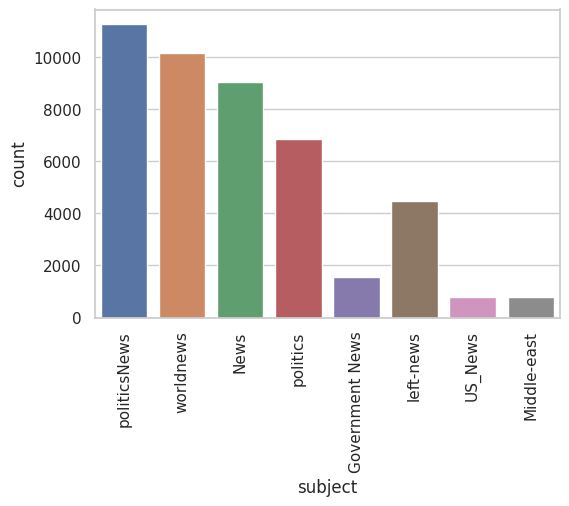

In [8]:
plt.figure(figsize = (6,4))
sns.set(style = "whitegrid",font_scale = 1.0)
chart = sns.countplot(x = "subject", data = data)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

--------------------------------------------------------------

<font size="4">**Data preprocessing**</font>

In [9]:
data['text'] = data['title'] +' '+data['text']
del data['title']
del data['subject']
del data['date']

In [10]:
data.head()

,text,label
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1


As the title, author column will not going to be helpful in identification of the news. So, we can drop these column.

In [11]:
data.shape

(44898, 2)

Check if there is any null value (If so, then we will drop those rows)

In [12]:
data.isnull().sum() # get the count of missing/NULL values for each column. if present remove missing values

text     0
label    0
dtype: int64

 Now we have to shuffle the dataset to prevent the model to get bias

In [13]:
#Shuffling the data by sampling it randomly, then resetting the index and dropping the previous index column
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,text,label
0,Car bomb kills journalist in Somali capital MO...,1
1,"Finally, Obama Speaks: Americans Need to ‘Reco...",0
2,TRUMP IS RIGHT! FOUR REASONS WHY The Judge In ...,0
3,President Obama ‘Schools’ NBA Champion Stephe...,0
4,TROLL CONGRESSWOMAN WANTS YOU TO SELL YOUR GUN...,0


Now Let’s explore the unique values in the each category using below code.

<Axes: xlabel='label', ylabel='count'>

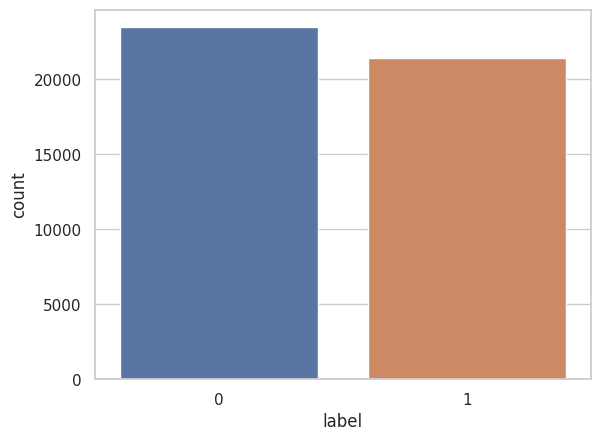

In [14]:
sns.countplot(data=data,
              x='label',
              order=data['label'].value_counts().index)

--------------------------------------------------------------

<font size="4">**Data Cleaning**</font>

Once we have all the required modules, we can create a function name preprocess text. This function will preprocess all the data given as input.

In [15]:
def preprocess_text(text):
    # TODO: create a function to clean your data
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Convert text to lowercase
    text = text.lower()

    # Tokenize the text
    tokens = nltk.word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join the tokens back into a single string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

data['text'] = data['text'].apply(preprocess_text)

<font size="4">**Converting text into Vectors**</font>

In [16]:
#TODO: explore different vectorization available with sklearn.feature_extraction.text


# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the preprocessed text data
X = vectorizer.fit_transform(data['text'])

# Print the shape of the vectorized data
print("Shape of vectorized data:", X.shape)



Shape of vectorized data: (44898, 219110)


-------------------------------------------------------------

<font size="4">**Model training, Evaluation, and Prediction**</font>

In [17]:
#TODO: Model training and print the accuracy score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data['label'], test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.987305122494432


In [18]:
# Display the Confusion matrix of Results from your classification algorithm
# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[4693   63]
 [  51 4173]]


**Accuracy**: The accuracy of our model is 0.9873, indicating that it correctly classifies approximately 98.73% of the instances in the test set.

**Confusion Matrix**: The confusion matrix provides a breakdown of the predicted labels compared to the actual labels.
Here's the interpretation of the confusion matrix:

True Positives (4693): The number of instances correctly classified as "True" news.

True Negatives (4173): The number of instances correctly classified as "Fake" news.

False Positives (63): The number of instances wrongly classified as "True" news (actually "Fake" news).

False Negatives (51): The number of instances wrongly classified as "Fake" news (actually "True" news).

Overall, our model performs well with a high accuracy score of 0.9873

---------------------------------------------------------------

# Cross Validation

In [19]:
from sklearn.model_selection import cross_val_score

In [20]:

# Initialize the Logistic Regression model
model = LogisticRegression()

# Perform cross-validation
cv_scores = cross_val_score(model, X, data['label'], cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())


Cross-Validation Scores: [0.98530067 0.98641425 0.98797327 0.9888629  0.98563314]
Mean Cross-Validation Score: 0.9868368484642834


Obtaining high cross-validation scores indicates that our model performs consistently well across different folds of the data. A mean cross-validation score of around 0.9868 suggests that our model has a high average accuracy.

 Each score represents the accuracy achieved by the model on a particular fold of the data during cross-validation.

 The mean cross-validation score is the average of these individual scores, giving us an overall estimate of our model's performance.

With a mean cross-validation score of 0.9868, it indicates that our model has a high accuracy and is likely performing well in generalizing to unseen data. It's a good sign that our model is robust and not overfitting the training data.

--------------------------------------------------------------------

# Grid Search for Hyperparameter Tuning

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:

# Initialize the Logistic Regression model
model = LogisticRegression()

# Define the hyperparameters to tune
parameters = {'C': [0.1, 1, 10]}

# Perform grid search
grid_search = GridSearchCV(model, parameters, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Best Hyperparameters: {'C': 10}
Accuracy: 0.9934298440979955


The grid search for hyperparameter tuning has identified the best hyperparameters for our logistic regression model. The best value for the regularization parameter 'C' is 10.

After performing grid search and using the best hyperparameters, we achieved an accuracy of 0.9934 on the test set. This high accuracy indicates that our model is performing exceptionally well in classifying fake and true news.

---------------------------------------------------------------------

# Evaluating our model's performance using other metrics

In [23]:
from sklearn.metrics import classification_report

In [24]:

# Calculate precision, recall, and F1 score
report = classification_report(y_test, y_pred, target_names=['Fake', 'True'])

# Print the classification report
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      4756
        True       0.99      0.99      0.99      4224

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



**Precision**: The precision measures the proportion of correctly predicted positive instances out of all instances predicted as positive. In our case, both the "Fake" and "True" classes have a precision of 0.99, indicating that our model performs well in correctly identifying instances of both classes.

**Recall**: The recall measures the proportion of correctly predicted positive instances out of all actual positive instances. Similar to precision, both the "Fake" and "True" classes have a recall of 0.99, indicating that our model has a high ability to retrieve instances from both classes.

**F1-score**: The F1 score is the harmonic mean of precision and recall, providing a balanced measure of the model's performance. For both the "Fake" and "True" classes, the F1 scores are 0.99, indicating a strong overall performance.

**Support**: The support column shows the number of instances for each class in the test set. We have 4756 instances of the "Fake" class and 4224 instances of the "True" class.

**Accuracy**: The overall accuracy of our model is 0.99, which means that it correctly classifies 99% of the instances in the test set.

-----------------------------------------------------------------------------------------------------------------------

## Roc curve

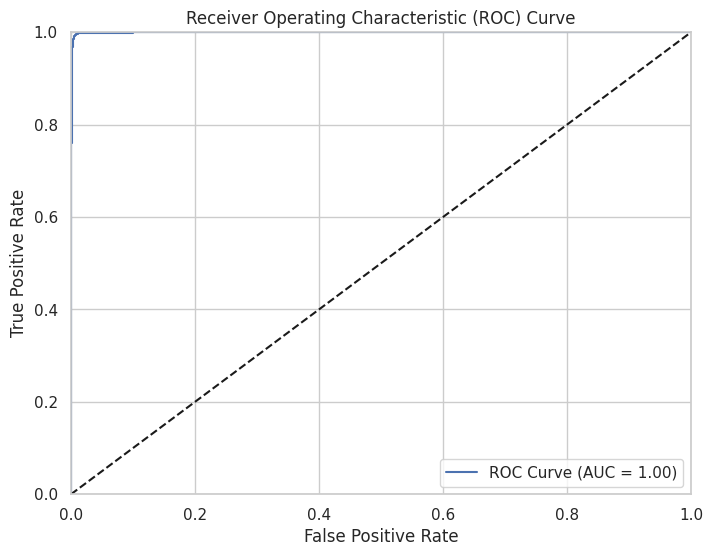

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


**model.decision_function(X_test)** calculates the decision function or predicted probabilities for the positive class. **roc_curve** computes the false positive rate (FPR), true positive rate (TPR), and corresponding thresholds. **auc** calculates the area under the ROC curve (AUC) using the FPR and TPR values.

The ROC curve is plotted using **plt.plot**, with the FPR on the x-axis and TPR on the y-axis. The AUC is displayed in the plot's legend. The plt.xlim, plt.ylim, plt.xlabel, plt.ylabel, and plt.title functions are used to set the plot's limits and labels.



AUC (Area Under the Curve) score of 1.00 means that our model has perfect discrimination between the positive and negative classes. This is an ideal scenario, indicating that our model is performing exceptionally well.

--------------------------------------------------------------